In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1,Q2,Q3

In [2]:
claims = pd.read_excel('claims.xlsx')
cust_demo = pd.read_excel('cust_demographics.xlsx')

In [3]:
cust_demo['CUST_ID'] = cust_demo['CUST_ID'].astype(str)

In [4]:
claims['claim_id'] = claims['claim_id'].astype(str)
claims['customer_id'] = claims['customer_id'].astype(str)
claims['claim_amount'] = claims['claim_amount'].str.replace('$', '').astype(float)
claims['claim_date'] = pd.to_datetime(claims['claim_date'])

In [5]:
print(claims.dtypes)
print(cust_demo.dtypes)

claim_id                       object
customer_id                    object
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object
CUST_ID                object
gender                 object
DateOfBirth    datetime64[ns]
State                  object
Contact                object
Segment                object
dtype: object


In [6]:
cust_demo.rename(columns={'CUST_ID':'customer_id'}, inplace=True)

In [7]:
data = pd.merge(claims, cust_demo, on='customer_id', how='left')

In [8]:
data.shape

(1100, 15)

### Q4.

In [9]:
data['Alert Flag (1/0)'] = np.where((data['claim_type']=='Injury only')
                                    &(data['police_report']=='No'),1,0)

In [10]:
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert Flag (1/0)
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
5,24050443,21831191,Other driver error,2017-04-10,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold,1
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0
7,27026412,73486606,Natural causes,2018-10-04,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,0
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,0
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,1966-09-09,RI,165-519-4583,Gold,0


In [11]:
data['Alert Flag (1/0)'].value_counts()

0    1039
1      61
Name: Alert Flag (1/0), dtype: int64

### Q5

### Q6

In [12]:
data.isnull().values.any()

True

In [13]:
data['claim_amount'] = data['claim_amount'].fillna(data['claim_amount'].mean())

In [14]:
data['total_policy_claims'] = data['total_policy_claims'].fillna(round(data['total_policy_claims'].mean()))

In [15]:
data1 = data.reset_index() ## creating a copy

In [16]:
data1 = data1.apply(lambda x:x.fillna(x.value_counts().index[0])) ## for categorical values

In [17]:
data1

,index,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert Flag (1/0)
0,0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,1,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.000000,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0
2,2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
4,4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
5,5,24050443,21831191,Other driver error,2017-04-10,Auto,No,Injury only,38306.500000,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold,1
6,6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0
7,7,27026412,73486606,Natural causes,2018-10-04,Auto,No,Material only,1160.000000,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,0
8,8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.000000,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,0
9,9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,Female,1966-09-09,RI,165-519-4583,Gold,0


### Q7

In [18]:
max(data1['claim_date']) 

Timestamp('2018-12-09 00:00:00')

In [19]:
data1['Age'] = (max(data1['claim_date']) - data1['DateOfBirth']).astype('<m8[Y]')

In [20]:
data1.head()

,index,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert Flag (1/0),Age
0,0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,39.0
1,1,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,48.0
2,2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,34.0
3,3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,32.0
4,4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,41.0


In [21]:
data1["Age"] = data1["Age"].astype(int)

In [22]:
data1.loc[(data1.Age < 18), 'Category'] = 'Children'
data1.loc[(data1.Age >= 18) & (data1.Age < 30), 'Category'] = 'Youth'
data1.loc[(data1.Age >= 30) & (data1.Age < 60), 'Category'] = 'Adult'
data1.loc[(data1.Age >= 60), 'Category'] = 'Senior'

In [23]:
data1

,index,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert Flag (1/0),Age,Category
0,0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,39,Adult
1,1,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.000000,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,48,Adult
2,2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,34,Adult
3,3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult
4,4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,41,Adult
5,5,24050443,21831191,Other driver error,2017-04-10,Auto,No,Injury only,38306.500000,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold,1,41,Adult
6,6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0,19,Youth
7,7,27026412,73486606,Natural causes,2018-10-04,Auto,No,Material only,1160.000000,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,0,19,Youth
8,8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.000000,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,0,25,Youth
9,9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,Female,1966-09-09,RI,165-519-4583,Gold,0,52,Adult


In [24]:
data1['Category'] = data1['Category'].astype(str)
data1['Category'].value_counts()

Adult    793
Youth    307
Name: Category, dtype: int64

### Q8

In [25]:
data1.groupby('Segment').mean()['claim_amount']

Segment
Gold        12746.446802
Platinum    12340.893306
Silver      12206.379320
Name: claim_amount, dtype: float64

### Q9

In [26]:
import datetime

a_date = datetime.date(2018, 10, 1)
days = datetime.timedelta(20)

new_date = a_date - days

In [27]:
new_date

datetime.date(2018, 9, 11)

In [28]:
q9 = data1[['claim_date','incident_cause','claim_amount']].loc[(data1['claim_date']>new_date)&(data1['claim_date']<=a_date)]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [29]:
q9.groupby('incident_cause').sum()['claim_amount']

incident_cause
Crime                   6840.000000
Driver error           12442.125121
Natural causes          1150.000000
Other causes          172076.125121
Other driver error     44889.500000
Name: claim_amount, dtype: float64

### Q10

In [30]:
q10 = data1.loc[(data1['State']=='TX')|(data1['State']=='DE')|(data1['State']=='AK')]

In [31]:
q10_a = q10.loc[q10['Category']=='Adult']

In [32]:
q10_b = q10_a.loc[(q10_a['incident_cause']=='Driver error') | (q10_a['incident_cause']=='Other driver error')]

In [33]:
print("There are",q10_b['customer_id'].nunique(),"Adults")

There are 25 Adults


### Q11

In [34]:
q11_a = data1.groupby('gender').sum()['claim_amount'].reset_index()
q11_b = data1.groupby('Segment').sum()['claim_amount'].reset_index()

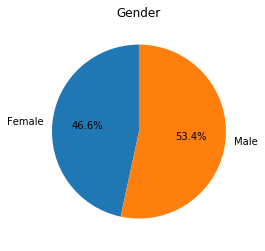

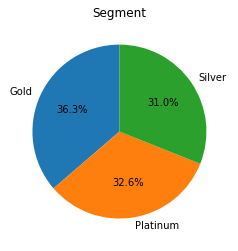

In [35]:
plt.figure(0)
plt.pie(q11_a['claim_amount'], labels=q11_a["gender"], autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.figure(1)
plt.pie(q11_b['claim_amount'], labels=q11_b["Segment"], autopct='%1.1f%%', startangle=90)
plt.title('Segment')
plt.show()

### Q12

In [36]:
q12 = data1[['gender','claim_amount']].loc[(data1['incident_cause']=='Driver error') | (data1['incident_cause']=='Other driver error')]

In [37]:
q12_a = q12.groupby('gender').sum()['claim_amount'].reset_index()

In [38]:
q12_a

,gender,claim_amount
0,Female,3.139313e+06
1,Male,4.111833e+06


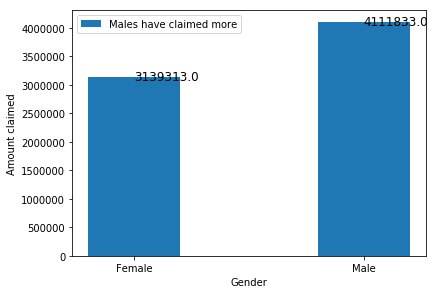

In [39]:
plt.bar(q12_a.gender, q12_a.claim_amount, label='Males have claimed more', width=0.4)

for index,data in enumerate(round(q12_a.claim_amount)):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12), va='center')
plt.tight_layout()

plt.xlabel("Gender")
plt.ylabel("Amount claimed")

plt.legend()

plt.show()

### Q13

In [40]:
q13 = data1['Category'].loc[data1['fraudulent']=='Yes'].reset_index()

In [41]:
q13_a = q13.groupby('Category').size().reset_index(name='count')

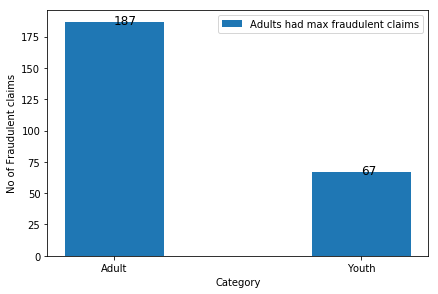

In [42]:
plt.bar(q13_a['Category'], q13_a['count'], label='Adults had max fraudulent claims', width=0.4)

for index,data in enumerate(q13_a['count']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12), va='center')
plt.tight_layout()

plt.xlabel("Category")
plt.ylabel("No of Fraudulent claims")

plt.legend()

plt.show()

### Q14

In [43]:
data1['month'] = data1['claim_date'].dt.strftime('%b')

In [44]:
data1

,index,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert Flag (1/0),Age,Category,month
0,0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,39,Adult,Nov
1,1,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.000000,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,48,Adult,Mar
2,2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,34,Adult,Feb
3,3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult,Jun
4,4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,41,Adult,Jan
5,5,24050443,21831191,Other driver error,2017-04-10,Auto,No,Injury only,38306.500000,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold,1,41,Adult,Apr
6,6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0,19,Youth,Jan
7,7,27026412,73486606,Natural causes,2018-10-04,Auto,No,Material only,1160.000000,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,0,19,Youth,Oct
8,8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.000000,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,0,25,Youth,Feb
9,9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,Female,1966-09-09,RI,165-519-4583,Gold,0,52,Adult,Jul


In [45]:
q14 = data1.groupby('month').sum()['claim_amount'].reset_index(name = 'Total')

In [46]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
q14['month'] = pd.Categorical(q14['month'], categories=months, ordered=True)
q14.sort_values(by='month',inplace=True)
q14 = q14.reset_index(drop=True)
q14

,month,Total
0,Jan,1.377689e+06
1,Feb,9.892548e+05
2,Mar,1.422297e+06
3,Apr,1.106042e+06
4,May,9.676688e+05
5,Jun,1.417138e+06
6,Jul,1.523644e+06
7,Aug,7.969446e+05
8,Sep,1.122680e+06
9,Oct,1.579940e+06


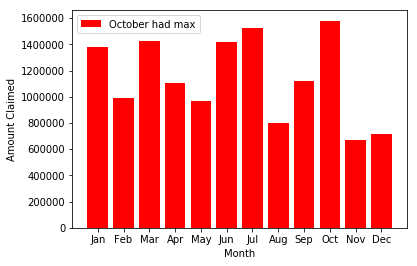

In [47]:

plt.bar(q14['month'], q14['Total'], label='October had max', color='r')

plt.xlabel("Month")
plt.ylabel("Amount Claimed")

plt.legend()

plt.show()

### Q15

In [48]:
q15 = data1.groupby(['fraudulent','gender','Category']).sum()['claim_amount'].reset_index()

In [49]:
q15

,fraudulent,gender,Category,claim_amount
0,No,Female,Adult,3.507900e+06
1,No,Female,Youth,1.477621e+06
2,No,Male,Adult,3.903775e+06
3,No,Male,Youth,1.506597e+06
4,Yes,Female,Adult,1.130767e+06
5,Yes,Female,Youth,2.641055e+05
6,Yes,Male,Adult,1.511534e+06
7,Yes,Male,Youth,3.840399e+05


### Q16

In [50]:
data1['gender'].value_counts()

Male      571
Female    529
Name: gender, dtype: int64

In [51]:
import scipy.stats as stats

In [52]:
data1.groupby('gender').mean()['claim_amount']

gender
Female    12061.233702
Male      12795.000008
Name: claim_amount, dtype: float64

In [53]:
male=data1[data1.gender=='Male']
female=data1[data1.gender=='Female']

In [54]:
stats.ttest_ind(male.claim_amount,female.claim_amount,equal_var=False)

Ttest_indResult(statistic=0.9116109971881311, pvalue=0.3621740357735377)

In [55]:
# Null Hypothesis -> There is no significant difference in the avg amount claimed by both genders
# Alternate Hypothesis -> There is significant difference in the avg amount claimed by both genders
# p-value > 0.05 => Fail to reject Null Hypothesis. Hence, males and females have apparently claimed same amounts                   

### Q17

In [56]:
table = pd.crosstab(data1['Category'],data1['Segment'])
print(table)

Segment   Gold  Platinum  Silver
Category                        
Adult      290       251     252
Youth      100       111      96


In [57]:
val = stats.chi2_contingency(table)
val

(2.3796657041850002,
 0.3042721182643778,
 2,
 array([[281.15454545, 260.96909091, 250.87636364],
        [108.84545455, 101.03090909,  97.12363636]]))

In [58]:
Observed_Values = table.values
Expected_Values = val[3]

In [59]:
no_of_rows=len(table.iloc[0:2,0])
no_of_columns=len(table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom: ",ddof)
alpha = 0.05

Degree of Freedom:  2


In [60]:
from scipy.stats import chi2

In [61]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [62]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  2
p-value: 0.30702785406062005


In [63]:
if p_value<=alpha:
    print("Reject Null i.e There is a relationship between Category and Segment")
else:
    print("Retain Null i.e There is no relationship between Category and Segment")

Retain Null i.e There is no relationship between Category and Segment


### Q18

In [78]:
data1['year'] = pd.DatetimeIndex(data1['claim_date']).year.astype(str)

In [65]:
sample_size = 300
amount_sample = np.random.choice(data1.claim_amount, sample_size)

In [66]:
from scipy.stats import ttest_1samp

In [67]:
ttest_1samp(amount_sample, 10000)

Ttest_1sampResult(statistic=3.7614915284027, pvalue=0.00020320155425862456)

In [68]:
p_value_exact = 0.095955544695513/2
p_value_exact

0.0479777723477565

In [69]:
# Null Hypothesis -> Population claimed amount <= 10000
# Alternate Hypothesis -> Population claimed amount > 10000
# p-value < 0.05 => Reject Null Hypothesis. Hence, Claimed amount has shown significant rise  

### Q19

In [70]:
adult=data1[data1.Category=='Adult']
youth=data1[data1.Category=='Youth']

In [71]:
stats.ttest_ind(adult.claim_amount,youth.claim_amount,equal_var=False)

Ttest_indResult(statistic=0.95702233621812, pvalue=0.33895920853497097)

In [72]:
# Null Hypothesis -> There is no significant difference in the avg amount claimed by both Age groups
# Alternate Hypothesis -> There is significant difference in the avg amount claimed by both Age groups
# p-value > 0.05 => Fail to reject Null Hypothesis. Hence, Adult and Youth have apparently claimed same amounts  

In [73]:
data1.groupby('Category').mean()['claim_amount']

Category
Adult    12678.404326
Youth    11831.801311
Name: claim_amount, dtype: float64

### Q20

In [74]:
import seaborn as sns

In [82]:
matrix =  data1.corr()

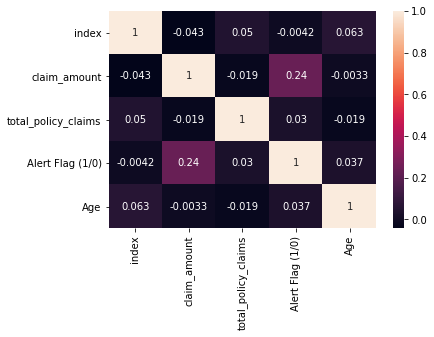

In [83]:
sns.heatmap(matrix, annot=True)
plt.show()

In [84]:
print('Correlation value of -0.019 suggests there is hardly any relationship b/w Total claims and claimed amount')

Correlation value of -0.019 suggests there is hardly any relationship b/w Total claims and claimed amount
